# <p style="text-align: center;"> Trabalho Prático 01</p>

### <p style="text-align: center;"> Alunos: <br> Ana Luisa Rodrigues - 2014137530 <br> Matheus Vargas - 2014144812


### Objetivo

O objetivo deste trabalho prático é a implementação do Chroma Key, uma sobreposição de imagens com fundo verde sobre um fundo arbitrário, com a utilização do notebook Jupyter e a linguagem Python. </p>

Inicialmente selecionamos 4 imagens com fundo verde ('dilma.jpg', 'dog.jpg', 'mario.jpg', 'minion.jpg') e uma imagem para servir como fundo para a composição ('fundo.jpg'). As imagens de fundo verde foram escolhidas aleatoriamente enquanto a imagem de fundo foi escolhida com o propósito de ciar um "jogo" de encontrar as imagens no fundo do desenho animado "Onde está Wally?". O projeto será dividido em 4 partes: aplicação do Chroma Key nas imagens de fundo verde; aplicação de operações sobre as imagens já com o fundo removido; combinação de todas as imagens no fundo e formação de uma única imagem; e exibição da imagem resultante.

### Importação e definições de funções

In [95]:
import skimage
import skimage.io as io
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
from skimage.morphology import erosion

import numpy as np

from scipy import ndimage

import warnings
warnings.filterwarnings('ignore')

def show(img):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(img, cmap=plt.cm.gray)
    ax.set_axis_off()
    plt.show()

### Parte I - Aplicação do Chroma Key 

### Parte II - Aplicação de operações sobre as imagens

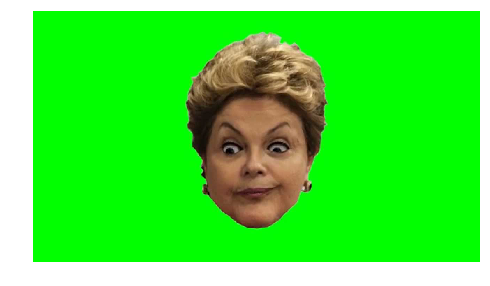

In [90]:
img_dilma = io.imread('dilma.jpg')

show(img_dilma)

Ao se carregar a imagem da Dilma, pode-se perceber que ela possui marcas de expressão e que a qualidade da imagem não está muito boa. Para melhorar esses dois fatores, será aplicado o filtro Gaussiano para suavização. 

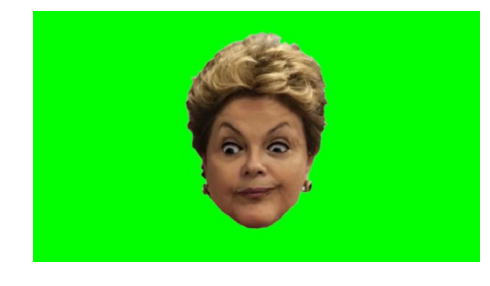

In [91]:
smooth_image = filters.gaussian(img_dilma, 1.5)
show(smooth_image)

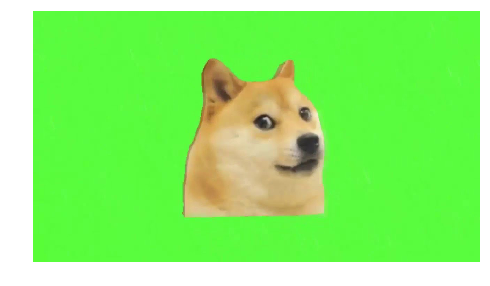

In [92]:
img_dog = io.imread('dog.jpg')

show(img_dog)

A imagem do cachorro será rotacionada horizontalmente e depois em 30 graus e será aplicado o filtro de realce, já que a imagem está muito suavizada.

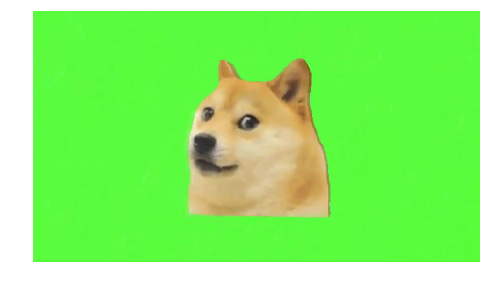

In [101]:
rotate_hor_dog = np.fliplr(img_dog)
show(rotate_hor_dog)

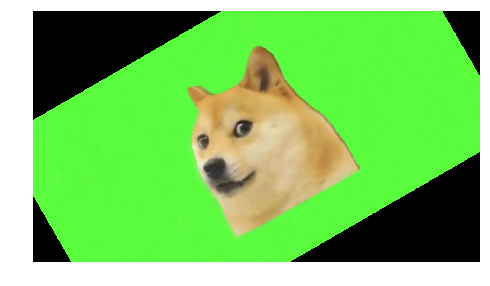

In [103]:
rotate_30_dog = ndimage.rotate(rotated_dog, 30, reshape=False)
show(rotate_30_dog)